In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error  


In [8]:
df=pd.read_csv('salary_data.csv') 
# Define X (make sure it's a 2D array) and y
X = df[['Experience']]  # Ensure it's double brackets for 2D shape
y = df['Salary']
df.head()


,Experience,Education,Certifications,JobRole,Location,Salary
0,1,0,0,Software Engineer,New York,55000
1,3,1,1,Data Scientist,San Francisco,78000
2,5,2,2,Manager,New York,110000
3,2,1,0,Software Engineer,Bangalore,40000
4,6,0,3,Software Engineer,San Francisco,95000


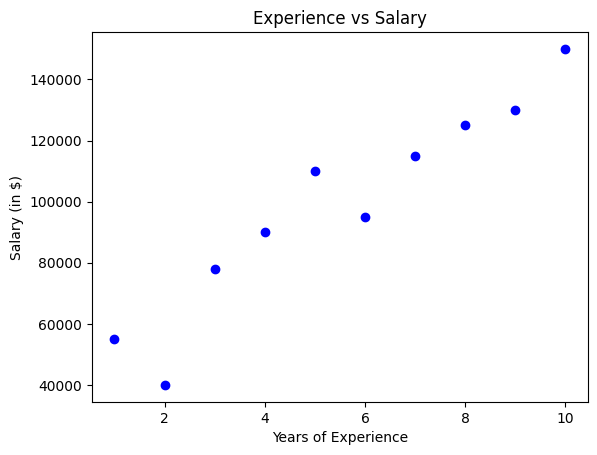

In [9]:
plt.scatter(df['Experience'], df['Salary'], color='blue')  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary (in $)")  
plt.title("Experience vs Salary")  
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


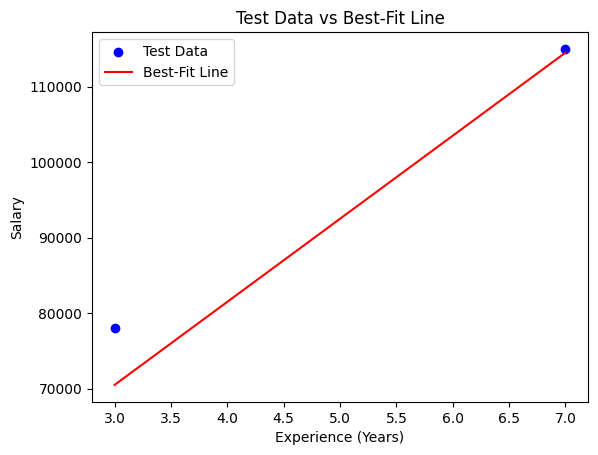

In [11]:
# Scatter plot of test data
plt.scatter(X_test, y_test, color='blue', label="Test Data")

# Best-fit line using X_test
plt.plot(X_test, y_pred, color='red', label="Best-Fit Line")

# Labels
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Test Data vs Best-Fit Line")
plt.legend()
plt.show()


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Mean Absolute Error: 4004.23
Mean Squared Error: 28378796.73
Model Coefficient (Slope): 11006.77
Model Intercept: 37461.93


In [13]:
X_test['Experience']

8    7
1    3
Name: Experience, dtype: int64

In [14]:
train_df=pd.DataFrame({
    'x_test':X_test['Experience'],
    'y_test':y_test,
    'y_pred':y_pred
})
train_df.head()

,x_test,y_test,y_pred
8,7,115000,114509.306261
1,3,78000,70482.233503


In [15]:
X_test.iloc[0].values.reshape(1,1)

array([[7]])

In [16]:
slope=model.coef_
slope

array([11006.76818951])

In [17]:
intercept= model.intercept_
intercept

np.float64(37461.92893401016)

In [18]:
x_test_by_formula=3
y_pred_by_formula= slope *x_test_by_formula + intercept
print("y_pred done by maths is :",y_pred_by_formula)

y_pred done by maths is : [70482.23350254]


/home/harsh/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


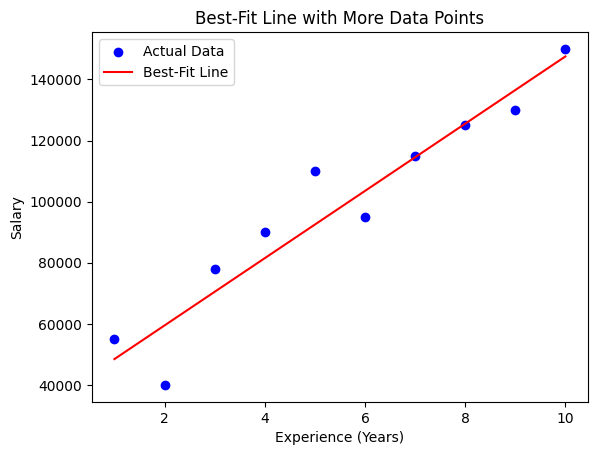

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('salary_data.csv')

# Prepare data
X = df[['Experience']]  # Ensure it's a 2D array
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate more data points for a smooth line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # 100 points in range
y_range_pred = model.predict(X_range)

# Plot
plt.scatter(X, y, color='blue', label="Actual Data")  # Full dataset
plt.plot(X_range, y_range_pred, color='red', label="Best-Fit Line")  # Smooth curve

# Labels
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Best-Fit Line with More Data Points")
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
y_prob = model.predict(X_test)  # Get probability of class 1

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_prob >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Print classification report
print(classification_report(y_test, y_pred))


[[0 0 0]
 [1 0 0]
 [1 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
       78000       0.00      0.00      0.00       1.0
      115000       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/home/harsh/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/harsh/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/harsh/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/harsh/.local/lib/python3.12